In [1]:
import numpy as np

In [2]:
from adjustText import adjust_text

In [3]:
import verdict

In [4]:
import cc.atlas as atlas

/Users/zhafen/repos/cc/cc/publication.py:334: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (


# Load

In [5]:
a = atlas.Atlas( '../cc/tests/data/example_atlas', bibtex_fp='../cc/tests/data/example_atlas/example.bib' )

Loading bibliography entries.


100%|██████████| 10/10 [00:00<00:00, 657.26it/s]

Storing bibliography entries.
Loading saved atlas data.



100%|██████████| 10/10 [00:00<00:00, 14639.80it/s]


#### Process the bibtex notes.

In [6]:
a.data.process_bibtex_annotations( word_per_concept=True )
a.data.identify_unique_key_concepts()

Dict, {
'VandeVoort2018a' : None,
'Stern2018' : None,
'Howk2017' : None,
'Garrison-kimmel2017' : None,
'Hopkins2017' : None,
'Hafen2016' : None,
'Muratov2016' : None,
'VandeVoort2016' : None,
'Hafen2019' : None,
'Hafen2019a' : None,
}

In [7]:
a.data['Hafen2019'].process_abstract()

In [8]:
# Retrieve Atlas Data
for key, item in a.data.items():
    print( key )
    item.process_abstract()

VandeVoort2018a
Stern2018
Howk2017
Garrison-kimmel2017
Hopkins2017
Hafen2016
Muratov2016
VandeVoort2016
Hafen2019
Hafen2019a


In [9]:
saved_data = a.save_data()

100%|██████████| 10/10 [00:00<00:00, 11973.46it/s]

Preparing to save data.
Saving to ../cc/tests/data/example_atlas/atlas_data.h5


# Plot

TypeError: inner_product() missing 1 required positional argument: 'key_b'

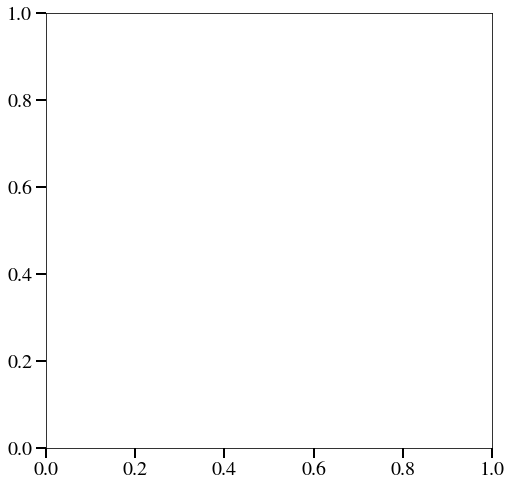

In [10]:
%matplotlib inline

figure = plt.figure( figsize=(8,8), facecolor='w' )
ax = plt.gca()

cospsi_a, cospsi_a_abs = a.plot_cospsi2d_custom(
    a,
    a,
    y_kwargs = { 'method': 'abstract similarity'},
    ax = ax,
)

ax.plot(
    [ 0, 1 ],
    [ 0, 1 ],
    linestyle = '--',
    linewidth = 2,
    color = 'k',
)

In [ ]:
%matplotlib inline

cospsi_a, cospsi_h19 = a.plot_cospsi2d_custom(
    a,
    a.data['Hafen2019'],
)

In [ ]:
figure = plt.figure( figsize=(8,8), facecolor='w' )
ax = plt.gca()

cospsi_a, cospsi_h19 = a.plot_cospsi2d_custom(
    a.data['Hafen2019'],
    a.data['Hafen2019'],
    y_kwargs = { 'method': 'abstract similarity'},
    ax = ax,
)

ax.plot(
    [ 0, 1 ],
    [ 0, 1 ],
    linestyle = '--',
    linewidth = 2,
    color = 'k',
)

# Reference-Based Exploration

## Populate

#### Populate with Citing Works
Can be done iteratively.

In [ ]:
# Download a bibtex file for all works that cite Hafen2019 and create a new atlas
a_H19_cit = atlas.Atlas.from_bibcodes( atlas_dir=a.atlas_dir, bibcodes=a['Hafen2019'].citations )

#### Populate with Referenced Works
Can also be done iteratively.

In [ ]:
# Download a bibtex file for all works that cite Hafen2019 and create a new atlas
a_H19_ref = atlas.Atlas.from_bibcodes( atlas_dir=a.atlas_dir, bibcodes=a['Hafen2019'].references )

In [ ]:
a['Hafen2019'].citation

#### Alternatively, import to the existing dictionary

## Process Data

* Rework inner product to use the matrix of projections (move current inner_product to a new named function)
* Allow updating of the matrix when the set of concept basis vectors are increased

## Visualize

Plot that shows cosPsi for both referenced and cited works.

$\cos \Psi$ for
* central works
* a couple of concept vectors
* the vector that describes your upcoming publication
* a vector that predicts high citability 

## Select

## Read

### Download Full Text from ArXiv

### Open PDF/Mendeley Externally
While this might seem excessive, QoL differences like this are important.

### Open Figures in NB

### Natural Language Processing of Text to Create a Summary PDF

# Scratch

In [ ]:
import bibtexparser

In [ ]:
import ads

In [ ]:
import numpy as np

In [ ]:
q = ads.ExportQuery( [ '2020MNRAS.492.3465H' ], format='bibtex' )

In [ ]:
bibtex_str = q.execute()

for i in range( 20 ):
    bibtex_str = bibtex_str.replace( '\n ', '\n' )

bibtex_str = bibtex_str.replace( 'ARTICLE', 'article' )

bibtex_str = bibtex_str.replace( '2020MNRAS.492.3465H', 'Hopkins2019' )

bibtex_str = bibtex_str.replace( '\mnras', 'MNRAS' )

bibtex_str = bibtex_str[:-1]

In [ ]:
# Reformat some lines
# This is not optimized.
l = []
for line in bibtex_str.split( '\n' ):
    
    # ADS puts quotes instead of double brackes around the title
    if 'title =' in line:
        bibtex_str = bibtex_str.replace( '"{', '{{' ).replace( '}"', '}}' )
    
    # ADS' bib export for months doesn't have brackets around it...
    if 'month =' in line:
        line = line.replace( '= ', '= {' ).replace( ',', '},' )
        
    l.append( line )
bibtex_str = '\n'.join( l )

In [ ]:
fp = './test.bib'
actual_fp = './actual.bib'

In [ ]:
with open( fp, 'w' ) as f:
    f.write( bibtex_str )

In [ ]:
with open( fp, 'r' ) as f:
#     test_output = f.read( -1 )
    bib_database = bibtexparser.load( f )

In [ ]:
bib_database.entries

In [ ]:
with open( actual_fp, 'r' ) as f:
#     output = f.read( -1 )
    bib_database = bibtexparser.load( f )

In [ ]:
bib_database.entries

In [ ]:
output

In [ ]:
bibtex_sorted = sorted( bibtex_str )
output_sorted = sorted( output )

In [ ]:
bibtex_only = []
for i, c in enumerate( bibtex_sorted ):
    
    if c in output_sorted:
        output_sorted.remove( c )
    else:
        bibtex_only.append( c )
output_only = output_sorted

In [ ]:
output_only

In [ ]:
bibtex_only

In [ ]:
output

In [ ]:
for i, c in enumerate( bibtex_str ):
    

In [ ]:
 a.data['Hafen2019'].references[-1]

In [ ]:
p = list( ads.SearchQuery( bibcode='2020MNRAS.492.3465H' ) )[0]

In [ ]:
p.bibtex

In [ ]:
q = list( ads.SearchQuery( { 'bibcode': a.data['Hafen2019'].references[0] },) _

In [ ]:
p = a.data['Hafen2019']

In [ ]:
p.

In [ ]:
a.data['Hafen2019'].references